In [ ]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\eladt\anaconda3\envs\myproject\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

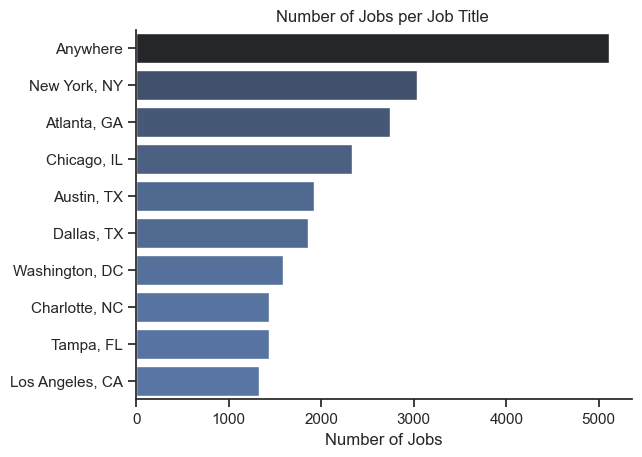

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title ('Number of Jobs per Job Title ')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


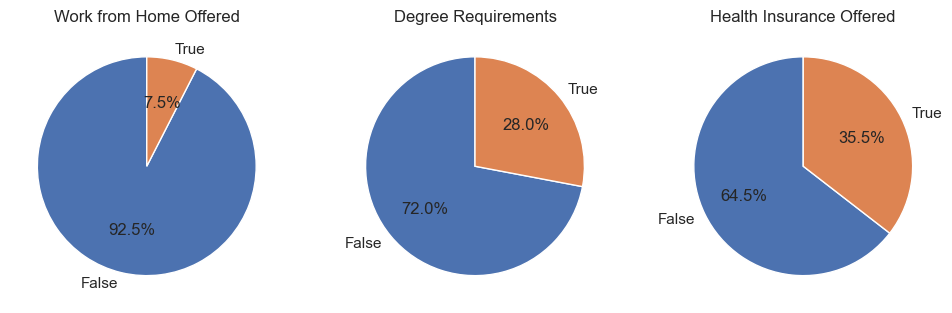

In [11]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirements',
    'job_health_insurance': 'Health Insurance Offered'
}


fig, ax = plt.subplots(1, 3)   # במקום subplot
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),
              labels=['False','True'],
              autopct='%1.1f%%',
              startangle=90)
    ax[i].set_title(title)

plt.show()